## Processing MRI Image Data

In [28]:
import pandas as pd
import nibabel as nib
import os
import math
from tabulate import tabulate
import matplotlib.pyplot as plt

In [2]:
t1_files = []
for file in sorted(os.listdir('./images_t_1/')):
    t1_files.append(file)

In [3]:
t1_files
t1_subjects = []
for file in t1_files:
    t1_subjects.append(file[4:12])
# Convert to a set to get only unique values
# Use the unique session count to validate the volume
t1_subjects = set(t1_subjects)
len(t1_subjects)
# Return 1098 unique subjects
# This matches the data dictionary of:
# 609 Cognitively Normal + 489 Cognitive Decline 

1098

In [4]:
t1_files

['sub-OAS30001_ses-d0129_run-01_T1w.nii.gz',
 'sub-OAS30001_ses-d0129_run-02_T1w.nii.gz',
 'sub-OAS30001_ses-d0757_run-01_T1w.nii.gz',
 'sub-OAS30001_ses-d0757_run-02_T1w.nii.gz',
 'sub-OAS30001_ses-d2430_T1w.nii.gz',
 'sub-OAS30001_ses-d3132_T1w.nii.gz',
 'sub-OAS30002_ses-d0371_T1w.nii.gz',
 'sub-OAS30002_ses-d0653_run-01_T1w.nii.gz',
 'sub-OAS30002_ses-d0653_run-02_T1w.nii.gz',
 'sub-OAS30002_ses-d2340_run-01_T1w.nii.gz',
 'sub-OAS30002_ses-d2340_run-02_T1w.nii.gz',
 'sub-OAS30002_ses-d2345_T1w.nii.gz',
 'sub-OAS30003_ses-d0558_run-01_T1w.nii.gz',
 'sub-OAS30003_ses-d0558_run-02_T1w.nii.gz',
 'sub-OAS30003_ses-d1631_run-01_T1w.nii.gz',
 'sub-OAS30003_ses-d1631_run-02_T1w.nii.gz',
 'sub-OAS30003_ses-d2669_T1w.nii.gz',
 'sub-OAS30003_ses-d2682_T1w.nii.gz',
 'sub-OAS30003_ses-d3320_T1w.nii.gz',
 'sub-OAS30003_ses-d3731_T1w.nii.gz',
 'sub-OAS30004_ses-d1101_run-01_T1w.nii.gz',
 'sub-OAS30004_ses-d1101_run-02_T1w.nii.gz',
 'sub-OAS30004_ses-d2229_run-01_T1w.nii.gz',
 'sub-OAS30004_ses-d2

In [92]:
# pretty print tables in jupyter
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', 1000)
#pd.set_option('display.colheader_justify', 'center')
#pd.set_option('display.precision', 3)

In [181]:
# Pull in csv data files that were downloaded from XNAT
# XNAT username replaced with file description name.
diagnosis_df = pd.read_csv('diagnosis_data_10_20_2021_9_5_0.csv')
subject_df = pd.read_csv('subjects_data_10_20_2021_9_1_11.csv')
mr_data_df = pd.read_csv('mr_data_10_21_2021_8_18_35.csv')

In [182]:
len(mr_data_df)

2168

In [212]:
# Separate the session id and add as an additional column.
# Session IDs are used to evaluate volume in the data dictionary
mr_data_df['Session'] = mr_data_df['MR ID'].str[-5:]
len(mr_data_df)
test = mr_data_df[mr_data_df['Session']=='d3132']
test = test['Scans'].tolist()
test = str(test[0])
test = test.split(', ')
for item in test:
    if "T1" in item:
        count = item[item.find('(')+1:item.find(')')]
        print('item: ',item, count)
total_t2_scans = 0
for scan in mr_data_df['Scans']:
    #test = scan.tolist()
    #test = str(test[0])
    #test = test.split(', ')
    print(scan)
    for item in scan.split(', '):
        #print(item)
        if "FLAIR" in item:
            print(item)
            count = item[item.find('(')+1:item.find(')')]
            print('item: ',item, count)
            total_t2_scans += int(count)
total_t2_scans

item:  T1w(1) 1
bold(3), T1w(2), T2w(2)
bold(2), dwi(1), minIP(1), swi(1), T1w(2), T2star(1), T2w(2)
angio(1), asl(1), dwi(2), fieldmap(3), FLAIR(1), T1w(1), T2star(1), T2w(1)
FLAIR(1)
item:  FLAIR(1) 1
asl(2), bold(2), dwi(2), fieldmap(3), T1w(1), T2star(1), T2w(2)
T1w(1), T2w(2)
bold(2), T1w(2), T2w(2)
angio(1), asl(1), bold(2), dwi(2), fieldmap(3), FLAIR(1), T1w(2), T2star(1), T2w(2)
FLAIR(1)
item:  FLAIR(1) 1
asl(2), bold(2), dwi(2), fieldmap(3), GRE(2), minIP(1), swi(1), T1w(1), T2star(1), T2w(2)
bold(3), T1w(2), T2w(2)
asl(2), bold(2), dwi(2), FLAIR(1), GRE(2), minIP(1), swi(1), T1w(2), T2star(1), T2w(2)
FLAIR(1)
item:  FLAIR(1) 1
asl(2), bold(2), dwi(2), fieldmap(3), GRE(2), minIP(1), swi(1), T1w(1), T2star(1), T2w(2)
angio(5), asl(1), dwi(1), fieldmap(3), FLAIR(1), T1w(1), T2star(1), T2w(1)
FLAIR(1)
item:  FLAIR(1) 1
angio(1), T1w(1)
angio(1), asl(1), bold(2), dwi(2), fieldmap(3), FLAIR(1), T1w(1), T2star(1), T2w(1)
FLAIR(1)
item:  FLAIR(1) 1
bold(3), dwi(1), minIP(1), swi(1), 

bold(3), dwi(1), minIP(1), swi(1), T1w(2), T2star(1), T2w(2)
angio(1), asl(2), bold(2), dwi(2), fieldmap(3), GRE(2), minIP(1), swi(1), T1w(1), T2star(1), T2w(2)
T1w(3), T2w(2)
bold(2), dwi(1), minIP(1), swi(1), T1w(2), T2star(1), T2w(2)
bold(2), dwi(6), minIP(1), swi(1), T1w(2), T2star(1), T2w(2)
angio(1), bold(2), dwi(2), fieldmap(3), GRE(2), minIP(1), swi(1), T1w(1), T2star(1), T2w(2)
angio(1), bold(2), dwi(2), fieldmap(3), GRE(2), minIP(1), swi(1), T1w(1), T2star(1), T2w(2)
bold(2), dwi(1), minIP(1), swi(1), T1w(2), T2star(1), T2w(2)
angio(1), asl(1), bold(2), dwi(1), fieldmap(3), FLAIR(1), T1w(1), T2star(1), T2w(1)
FLAIR(1)
item:  FLAIR(1) 1
angio(1), asl(1), bold(1), dwi(2), fieldmap(3), FLAIR(1), T1w(1), T2star(1), T2w(1)
FLAIR(1)
item:  FLAIR(1) 1
FLAIR(1), GRE(2), minIP(1), swi(1), T1w(1), T2star(1), T2w(1)
FLAIR(1)
item:  FLAIR(1) 1
bold(2), dwi(1), minIP(1), swi(1), T1w(2), T2star(1), T2w(2)
bold(2), dwi(1), minIP(1), swi(1), T1w(2), T2star(1), T2w(2)
bold(3), T1w(2), T2w(2)


748

In [188]:
# There are three subjects that appear to have no scans performed.
# They will be removed from the list.
blank_scans = mr_data_df[mr_data_df['Scans'].isna()]
blank_scans

,MR ID,Date,Subject,Age,Scanner,Scans,FreeSurfers,PUPs,Session


In [185]:
# Remove the three subjects that had no scans performed
mr_data_df = mr_data_df[mr_data_df['Scans'].notna()]
len(mr_data_df)

2165

In [97]:
mr_t1_subjects = []
for subject in mr_data_df['Subject']:
    for scan in mr_data_df['Scans']:
        if 'T1' in scan and scan is not None:
            mr_t1_subjects.append(subject)

In [98]:
# Convert to a set to get unique values
mr_t1_subjects = set(mr_t1_subjects)
len(mr_t1_subjects)

1098

In [189]:
mr_t1_sessions = []
mr_data_sessions = mr_data_df[mr_data_df['Scans'].str.contains('T1')]
mr_t1_sessions = mr_data_sessions['Session']
len(mr_t1_sessions)

2162

In [100]:
mr_t1_sessions = set(mr_t1_sessions)
len(mr_t1_sessions)

1367

In [14]:
diagnosis_df['Session'] = diagnosis_df['UDS_D1DXDATA ID'].str[-5:-1]
diagnosis_df

,UDS_D1DXDATA ID,Subject,Date,Age,WHODIDDX,NORMCOG,DEMENTED,MCIAMEM,MCIAPLUS,MCIAPLAN,...,COGOTH,COGOTHX,COGOTHIF,COGOTH2,COGOTH2X,COGOTH2F,COGOTH3,COGOTH3X,COGOTH3F,Session
0,OAS30001_USDd1_d0000,OAS30001,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d000
1,OAS30001_USDd1_d0339,OAS30001,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d033
2,OAS30001_USDd1_d0722,OAS30001,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,d072
3,OAS30001_USDd1_d1106,OAS30001,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,d110
4,OAS30001_USDd1_d1456,OAS30001,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,d145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4084,OAS31172_USDd1_d0406,OAS31172,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,d040
4085,OAS31172_USDd1_d0823,OAS31172,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,d082
4086,OAS31172_USDd1_d1215,OAS31172,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,d121
4087,OAS31172_USDd1_d1565,OAS31172,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,d156


In [190]:
unique_subjects = set(diagnosis_df['Subject'])
copy_t1_subjects = t1_subjects.copy()
for subject in unique_subjects:
    if subject in t1_subjects:
        copy_t1_subjects.remove(subject)

{'OAS30020',
 'OAS30024',
 'OAS30039',
 'OAS30042',
 'OAS30057',
 'OAS30068',
 'OAS30089',
 'OAS30102',
 'OAS30105',
 'OAS30114',
 'OAS30123',
 'OAS30151',
 'OAS30159',
 'OAS30181',
 'OAS30189',
 'OAS30210',
 'OAS30213',
 'OAS30228',
 'OAS30235',
 'OAS30270',
 'OAS30281',
 'OAS30292',
 'OAS30304',
 'OAS30312',
 'OAS30341',
 'OAS30348',
 'OAS30360',
 'OAS30364',
 'OAS30376',
 'OAS30377',
 'OAS30385',
 'OAS30386',
 'OAS30404',
 'OAS30422',
 'OAS30427',
 'OAS30434',
 'OAS30448',
 'OAS30459',
 'OAS30468',
 'OAS30469',
 'OAS30475',
 'OAS30485',
 'OAS30491',
 'OAS30508',
 'OAS30515',
 'OAS30519',
 'OAS30527',
 'OAS30561',
 'OAS30567',
 'OAS30585',
 'OAS30594',
 'OAS30607',
 'OAS30637',
 'OAS30644',
 'OAS30659',
 'OAS30663',
 'OAS30679',
 'OAS30690',
 'OAS30691',
 'OAS30695',
 'OAS30746',
 'OAS30751',
 'OAS30758',
 'OAS30763',
 'OAS30764',
 'OAS30766',
 'OAS30779',
 'OAS30809',
 'OAS30862',
 'OAS30922',
 'OAS30943',
 'OAS30945',
 'OAS30951',
 'OAS30958',
 'OAS30970',
 'OAS30988',
 'OAS31011',

In [17]:
diagnosis_df['DEMENTED'].sum()

874.0

In [20]:
diagnosis_df['Subject'].count()

4089

In [21]:
diagnosis_df['DEMENTED'].sum() / diagnosis_df['Subject'].count()

0.21374419173392029

In [213]:
diagnosis_df['NORMCOG'].sum()

2887.0

In [214]:
4089-2887

1202

In [7]:
t2_files = []
for file in sorted(os.listdir('./images_t_2/')):
    t2_files.append(file)

In [8]:
t2_files

['sub-OAS30001_ses-d0129_T2w.nii.gz',
 'sub-OAS30001_ses-d0129_acq-TSE_T2w.nii.gz',
 'sub-OAS30001_ses-d0757_T2star.nii.gz',
 'sub-OAS30001_ses-d0757_T2w.nii.gz',
 'sub-OAS30001_ses-d0757_acq-TSE_T2w.nii.gz',
 'sub-OAS30001_ses-d2430_T2star.nii.gz',
 'sub-OAS30001_ses-d2430_acq-TSE_T2w.nii.gz',
 'sub-OAS30001_ses-d3132_T2star.nii.gz',
 'sub-OAS30001_ses-d3132_T2w.nii.gz',
 'sub-OAS30001_ses-d3132_acq-TSE_T2w.nii.gz',
 'sub-OAS30002_ses-d0371_acq-TSE_echo-1_T2w.nii.gz',
 'sub-OAS30002_ses-d0371_acq-TSE_echo-2_T2w.nii.gz',
 'sub-OAS30002_ses-d0653_T2w.nii.gz',
 'sub-OAS30002_ses-d0653_acq-TSE_T2w.nii.gz',
 'sub-OAS30002_ses-d2340_T2star.nii.gz',
 'sub-OAS30002_ses-d2340_T2w.nii.gz',
 'sub-OAS30002_ses-d2340_acq-TSE_T2w.nii.gz',
 'sub-OAS30002_ses-d2345_T2star.nii.gz',
 'sub-OAS30002_ses-d2345_T2w.nii.gz',
 'sub-OAS30002_ses-d2345_acq-TSE_T2w.nii.gz',
 'sub-OAS30003_ses-d0558_T2w.nii.gz',
 'sub-OAS30003_ses-d0558_acq-TSE_T2w.nii.gz',
 'sub-OAS30003_ses-d1631_T2star.nii.gz',
 'sub-OAS30003

In [15]:
OAS30040 = []
for file in t2_files:
    if "OAS30040" in file and "T2w" in file:
        OAS30040.append(file)
OAS30040
        

['sub-OAS30040_ses-d2899_acq-TSE_run-01_T2w.nii.gz',
 'sub-OAS30040_ses-d2899_acq-TSE_run-02_T2w.nii.gz',
 'sub-OAS30040_ses-d4230_T2w.nii.gz',
 'sub-OAS30040_ses-d4230_acq-TSE_T2w.nii.gz',
 'sub-OAS30040_ses-d5108_T2w.nii.gz',
 'sub-OAS30040_ses-d5108_acq-TSE_T2w.nii.gz']

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b'?TR:0.000 TE:0.00'
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256  45   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        1.        1.        4.0000534 0.        1.        1.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 255
glmin           : 0
descrip         : b'removed'
aux_file        : b'OAS30040_MR_d2899'
qform_code      : unknown
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffse

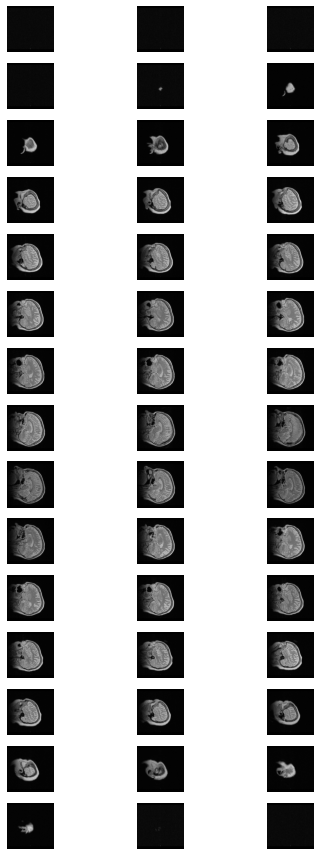

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b'?TR:0.000 TE:0.00'
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256  45   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.       1.       1.       4.000046 0.       1.       1.       0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 255
glmin           : 0
descrip         : b'removed'
aux_file        : b'OAS30040_MR_d2899'
qform_code      : unknown
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_

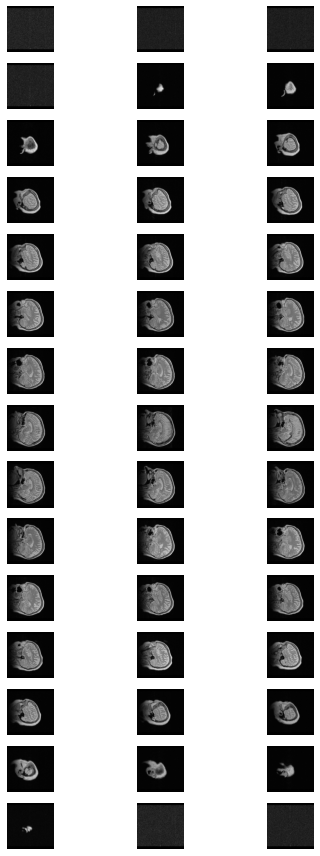

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 176 256 256   1   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        0.9999953 1.        1.        3.2       0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'removed'
aux_file        : b'OAS30040_MR_d4230'
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.14511108
quatern_c       : 0.04594126
quatern_d       : 0.013546198
qoffset_x       : -102.

/tmp/ipykernel_6970/3694683553.py:18: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


In [ ]:
for file in OAS30040:
    t2_image = nib.load("./images_t_2/" + file)
    print(t2_image.header)
    t2_image_data = t2_image.get_fdata()
    type(t2_image_data)
    print('Max z value = ' + str(t2_image_data.max().round(2)))
    print('Min z value = ' + str(t2_image_data.min().round(2)))
    fig = plt.figure(figsize=[8,12])
    subplot_counter = 1
    
    print('Num of slices = ', t2_image.header['dim'][3])
    
    for i in range(0, t2_image.header['dim'][3]):
        ax = fig.add_subplot(math.ceil(t2_image.header['dim'][3]/3), 3, subplot_counter)
        plt.imshow(t2_image_data[:,:,i], cmap='gray')
        plt.axis('off')
        
        plt.tight_layout()
        subplot_counter += 1
        
    plt.savefig('./figures/image_for_' + file + '.pdf')
    plt.show()